In [1]:
from packages.data_classes.data2D import Data2D
from packages.data_classes.mesh import Mesh
from packages.plot_classes.tangram import Tangram

In [2]:
import numpy

In [3]:
SD0203_mesh = Mesh('./Data/Geometry/SD/S20190203@25-6-66_24-6.v001.sno')
FS0308_mesh = Mesh('./Data/Geometry/FS/S20190308@25-10-50_25-6.v001.sno')
XD0130_mesh = Mesh('./Data/Geometry/XD/X20190130@31-12-68_26-6.v001.sno')

be careful! data2D reads in IyIx order but quadmesh has to drawn in IxIy order to take care of the cuts!

In [4]:
# Carbon density for C1+ ~ C6+
SD_nIon3 = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_ion/na-3_2D')
SD_nIon4 = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_ion/na-4_2D')
SD_nIon5 = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_ion/na-5_2D')
SD_nIon6 = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_ion/na-6_2D')
SD_nIon7 = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_ion/na-7_2D')
SD_nIon8 = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_ion/na-8_2D')

FS_nIon3 = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_ion/na-3_2D')
FS_nIon4 = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_ion/na-4_2D')
FS_nIon5 = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_ion/na-5_2D')
FS_nIon6 = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_ion/na-6_2D')
FS_nIon7 = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_ion/na-7_2D')
FS_nIon8 = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_ion/na-8_2D')

XD_nIon3 = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_ion/na-3_2D')
XD_nIon4 = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_ion/na-4_2D')
XD_nIon5 = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_ion/na-5_2D')
XD_nIon6 = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_ion/na-6_2D')
XD_nIon7 = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_ion/na-7_2D')
XD_nIon8 = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_ion/na-8_2D')

# electron density
SD_ne = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_electron/ne_2D')

FS_ne = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_electron/ne_2D')

XD_ne = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_electron/ne_2D')


some preparation calculation

In [5]:
# total carbon ion density

SD_nCarbonIon = SD_nIon3.IyIx + SD_nIon4.IyIx + SD_nIon5.IyIx + SD_nIon6.IyIx + SD_nIon7.IyIx + SD_nIon8.IyIx

FS_nCarbonIon = FS_nIon3.IyIx + FS_nIon4.IyIx + FS_nIon5.IyIx + FS_nIon6.IyIx + FS_nIon7.IyIx + FS_nIon8.IyIx

XD_nCarbonIon = XD_nIon3.IyIx + XD_nIon4.IyIx + XD_nIon5.IyIx + XD_nIon6.IyIx + XD_nIon7.IyIx + XD_nIon8.IyIx

calculate Carbon ion fraction

In [6]:
SD_CarbonIonFraction = SD_nCarbonIon/SD_ne.IyIx

FS_CarbonIonFraction = FS_nCarbonIon/FS_ne.IyIx

XD_CarbonIonFraction = XD_nCarbonIon/XD_ne.IyIx

take out the outer divertor part

In [7]:
SD_CarbonIonFraction_outerdiv = numpy.transpose(SD_CarbonIonFraction[:, SD0203_mesh.ixcut[1]:])

FS_CarbonIonFraction_outerdiv = numpy.transpose(FS_CarbonIonFraction[:, FS0308_mesh.ixcut[1]:])

XD_CarbonIonFraction_outerdiv = numpy.transpose(XD_CarbonIonFraction[:, XD0130_mesh.ixcut[1]:])

take a look at the data range

In [8]:
print(SD_CarbonIonFraction_outerdiv.max())
print(FS_CarbonIonFraction_outerdiv.max())
print(XD_CarbonIonFraction_outerdiv.max())

0.060418956248906724
0.09832887131701958
0.06411311510002093


In [9]:
print(SD_CarbonIonFraction_outerdiv.min())
print(FS_CarbonIonFraction_outerdiv.min())
print(XD_CarbonIonFraction_outerdiv.min())

1.9314385678983015e-05
3.0626257832327496e-06
0.0006186204545595225


calculate carbon Z

In [77]:
# first sum up all charge
# note that I can do the following because all data_2D arrays are numpy arrays, so + and * will be math rather than list cat
SD_CarbonCharge_outerdiv = numpy.transpose((SD_nIon3.IyIx
                                          + 2*SD_nIon4.IyIx
                                          + 3*SD_nIon5.IyIx
                                          + 4*SD_nIon6.IyIx
                                          + 5*SD_nIon7.IyIx
                                          + 6*SD_nIon8.IyIx)[:, SD0203_mesh.ixcut[1]:])

FS_CarbonCharge_outerdiv = numpy.transpose((FS_nIon3.IyIx
                                          + 2*FS_nIon4.IyIx
                                          + 3*FS_nIon5.IyIx
                                          + 4*FS_nIon6.IyIx
                                          + 5*FS_nIon7.IyIx
                                          + 6*FS_nIon8.IyIx)[:, FS0308_mesh.ixcut[1]:])

XD_CarbonCharge_outerdiv = numpy.transpose((XD_nIon3.IyIx
                                          + 2*XD_nIon4.IyIx
                                          + 3*XD_nIon5.IyIx
                                          + 4*XD_nIon6.IyIx
                                          + 5*XD_nIon7.IyIx
                                          + 6*XD_nIon8.IyIx)[:, XD0130_mesh.ixcut[1]:])

# <Z> Carbon without neutral
SD_ZCarbon_pureIon_outerdiv = SD_CarbonCharge_outerdiv/SD_nCarbon_outerdiv

FS_ZCarbon_pureIon_outerdiv = FS_CarbonCharge_outerdiv/FS_nCarbon_outerdiv

XD_ZCarbon_pureIon_outerdiv = XD_CarbonCharge_outerdiv/XD_nCarbon_outerdiv


# <Z> Carbon with neutral
SD_ZCarbon_witnNeut_outerdiv = SD_CarbonCharge_outerdiv/(SD_nCarbon_outerdiv + SD_nNeutC_outerdiv)

FS_ZCarbon_witnNeut_outerdiv = FS_CarbonCharge_outerdiv/(FS_nCarbon_outerdiv + FS_nNeutC_outerdiv)

XD_ZCarbon_witnNeut_outerdiv = XD_CarbonCharge_outerdiv/(XD_nCarbon_outerdiv + XD_nNeutC_outerdiv)

look at data range

In [78]:
print(SD_ZCarbon_pureIon_outerdiv.max())
print(FS_ZCarbon_pureIon_outerdiv.max())
print(XD_ZCarbon_pureIon_outerdiv.max())

print(SD_ZCarbon_witnNeut_outerdiv.max())
print(FS_ZCarbon_witnNeut_outerdiv.max())
print(XD_ZCarbon_witnNeut_outerdiv.max())

4.262026168254498
4.527697504408801
4.475368774595861
4.262026168254498
4.527697504408801
4.475368774595861


In [79]:
print(SD_ZCarbon_pureIon_outerdiv.min())
print(FS_ZCarbon_pureIon_outerdiv.min())
print(XD_ZCarbon_pureIon_outerdiv.min())

print(SD_ZCarbon_witnNeut_outerdiv.min())
print(FS_ZCarbon_witnNeut_outerdiv.min())
print(XD_ZCarbon_witnNeut_outerdiv.min())

1.0908290706958088
1.0180959488687102
1.0840030342213396
0.6431255912607305
0.4062477574052635
0.9304438585303574


# start attempting plots

## prepare the quad collection objects, without filling them with color yet

In [8]:
from matplotlib.collections import QuadMesh

be careful, here quadmesh is drawn using IxIy order!

In [9]:
quadmeshcoord_SD_outerdivertor = numpy.array(SD0203_mesh.GridPoint_IxIy[SD0203_mesh.ixcut[1]:])
stainedglass_SD_outerdivertor = QuadMesh(SD0203_mesh.ny + 1, SD0203_mesh.nx + 1 - SD0203_mesh.ixcut[1], quadmeshcoord_SD_outerdivertor)

quadmeshcoord_FS_outerdivertor = numpy.array(FS0308_mesh.GridPoint_IxIy[FS0308_mesh.ixcut[1]:])
stainedglass_FS_outerdivertor = QuadMesh(FS0308_mesh.ny + 1, FS0308_mesh.nx + 1 - FS0308_mesh.ixcut[1], quadmeshcoord_FS_outerdivertor)

quadmeshcoord_XD_outerdivertor = numpy.array(XD0130_mesh.GridPoint_IxIy[XD0130_mesh.ixcut[1]:])
stainedglass_XD_outerdivertor = QuadMesh(XD0130_mesh.ny + 1, XD0130_mesh.nx + 1 - XD0130_mesh.ixcut[1], quadmeshcoord_XD_outerdivertor)

In [10]:
stainedglass_SD_outerdivertor.set_linewidth(0.1)
stainedglass_SD_outerdivertor.set_edgecolor((0, 0, 0, 1))

stainedglass_FS_outerdivertor.set_linewidth(0.1)
stainedglass_FS_outerdivertor.set_edgecolor((0, 0, 0, 1))

stainedglass_XD_outerdivertor.set_linewidth(0.1)
stainedglass_XD_outerdivertor.set_edgecolor((0, 0, 0, 1))

## prepare figure and its axes

In [11]:
import matplotlib.pyplot as plt

fig_1, ax_1 = plt.subplots()

add a colorbar axes before instantiating a Tangram

In [12]:
ax_cb = fig_1.add_axes((1.75, 0.06, 0.3, 0.9))

In [13]:
colorcode = Tangram(ax_cb)

In [14]:
colorcode.read_colorbar("./Colors/21c-White2YellowMax.cb")

### putting the quad collections onto the axes and figure, without filling the colors yet

In [15]:
ax_1.add_collection(stainedglass_SD_outerdivertor)
ax_1.set_aspect('equal')
ax_1.set_xbound(1.08, 1.28)
ax_1.set_ybound(-1.38, -1.01)

In [16]:
ax_2 = fig_1.add_axes((0.50, 0.05, 0.63, 0.95))

In [17]:
ax_2.add_collection(stainedglass_FS_outerdivertor)
ax_2.set_aspect('equal')
ax_2.set_xbound(1.07, 1.34)
ax_2.set_ybound(-1.38, -1.01)

In [18]:
ax_3 = fig_1.add_axes((1.065, 0.05, 0.65, 0.95))

In [19]:
ax_3.add_collection(stainedglass_XD_outerdivertor)
ax_3.set_aspect('equal')
ax_3.set_xbound(1.10, 1.40)
ax_3.set_ybound(-1.38, -1.01)

In [20]:
ax_1.set_position((0.11, 0.05, 0.45, 0.95))
ax_2.set_position((0.50, 0.05, 0.63, 0.95))
ax_3.set_position((1.065, 0.05, 0.65, 0.95))

In [21]:
ax_cb.set_position((1.42, 0.00, 0.35, 0.95))

### add label to each subplot

In [22]:
SD_label = ax_1.text(1.09, -1.35, "SD10")
FS_label = ax_2.text(1.09, -1.35, "SD20")
XD_label = ax_3.text(1.36, -1.2, "XD")

In [23]:
SD_label.set_fontsize(20)
FS_label.set_fontsize(20)
XD_label.set_fontsize(20)

In [24]:
SD_label.set_position((1.09, -1.35))
FS_label.set_position((1.09, -1.35))
XD_label.set_position((1.36, -1.2))

### add x and y axis labels

In [25]:
axis_label_x_fig = fig_1.text(0.6, 0.0, 'R(m)', rotation = 'horizontal')
axis_label_y_fig = fig_1.text(0.0, 0.5, 'Z(m)', rotation = 'vertical')

In [26]:
axis_label_y_fig.set_fontsize(20)
axis_label_x_fig.set_fontsize(20)

In [27]:
axis_label_x_fig.set_position((0.85, -0.06))

hide the y-axis labels if using the same scale.

In [28]:
%%capture

# this will just hide the tick labels
ax_2.get_yaxis().set_ticklabels([])
ax_3.get_yaxis().set_ticklabels([])

### draw the colorbar without the bins

In [29]:
from matplotlib.collections import PolyCollection

In [30]:
bin_height = 0.99 / len(colorcode.color)

barverts = tuple(((0.89, i*bin_height+0.005), (0.99, i*bin_height+0.005), (0.99, (i+1)*bin_height+0.005), (0.89, (i+1)*bin_height+0.005)) for i in range(len(colorcode.color)))

In [31]:
bar_vertical = PolyCollection(barverts)

In [32]:
ax_cb.add_collection(bar_vertical)
bar_vertical.set_edgecolor('black')
bar_vertical.set_facecolor(colorcode.color)
bar_vertical.set_linewidth(0.5)

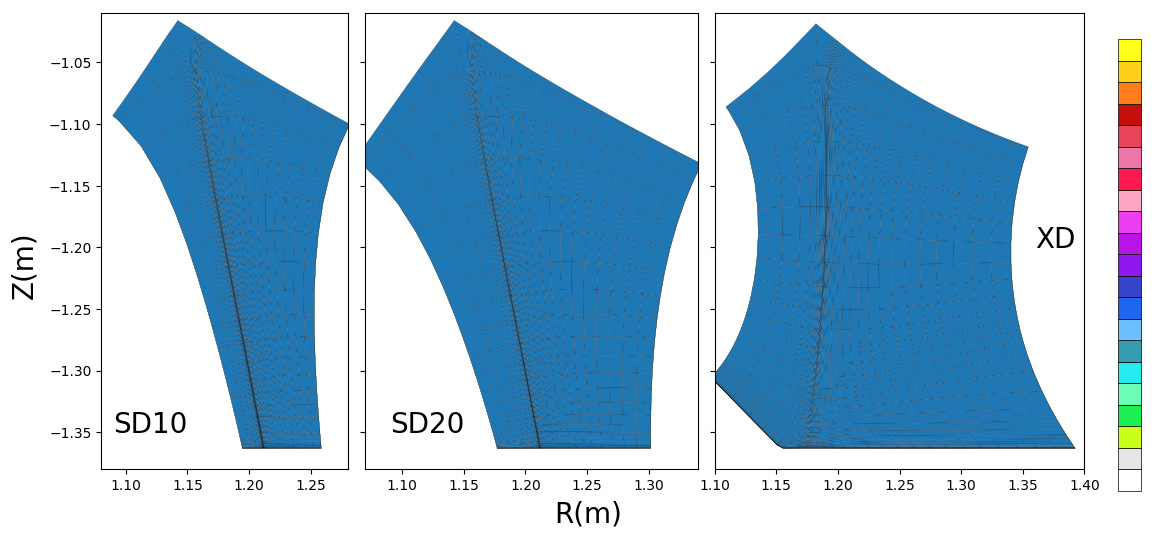

In [33]:
fig_1

## Now fill the quad collections with specific color to a data set

#### for Carbon ion fraction

rescale the data by $10^{3}$

In [63]:
SD_CarbonIonFraction_outerdiv_rescale = SD_CarbonIonFraction_outerdiv * 1e3

FS_CarbonIonFraction_outerdiv_rescale = FS_CarbonIonFraction_outerdiv * 1e3

XD_CarbonIonFraction_outerdiv_rescale = XD_CarbonIonFraction_outerdiv * 1e3

### set color code bin

In [84]:
# colorcode.bin = [1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 25, 30, 40, 50, 60, 70, 80, 90]
colorcode.bin = [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 15, 20, 25]

In [85]:
# if you want tuple, remember to use "tuple()", otherwise () will not give you a tuple in this case

colors_SD_CIonFraction_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(SD_CarbonIonFraction_outerdiv_rescale))

colors_FS_CIonFraction_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(FS_CarbonIonFraction_outerdiv_rescale))

colors_XD_CIonFraction_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(XD_CarbonIonFraction_outerdiv_rescale))

### fill the quad collection with color

In [86]:
stainedglass_SD_outerdivertor.set_facecolor(colors_SD_CIonFraction_outerdiv)

stainedglass_FS_outerdivertor.set_facecolor(colors_FS_CIonFraction_outerdiv)

stainedglass_XD_outerdivertor.set_facecolor(colors_XD_CIonFraction_outerdiv)

add text to color bar

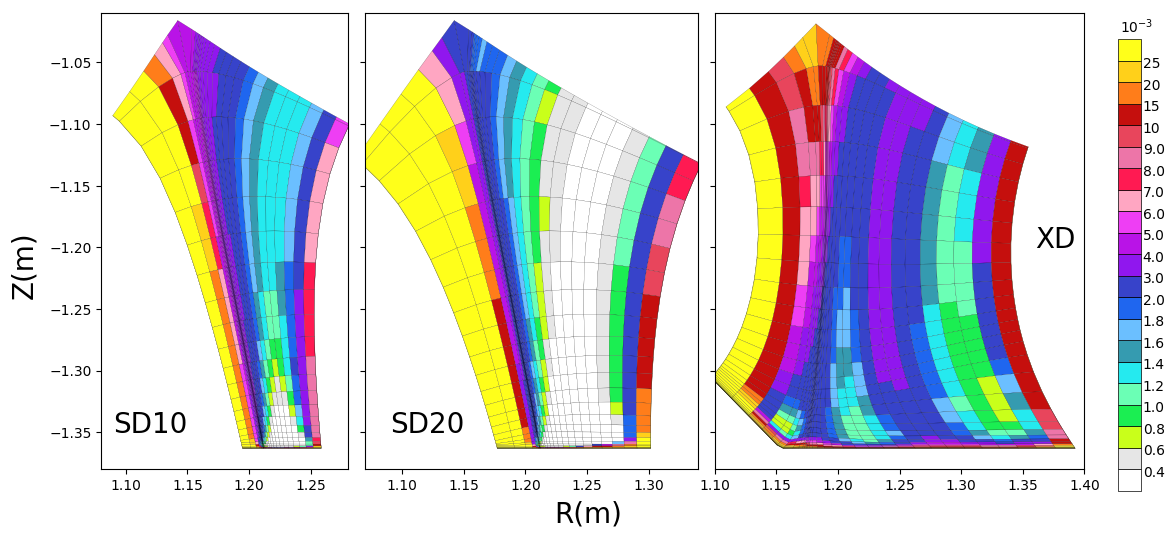

In [90]:
bin_text_fig_1 = [colorcode.axes.text(1.00, (i+1)*bin_height - 0.01, str(colorcode.bin[i])) for i in range(len(colorcode.bin))]
unit_fig_1 = colorcode.axes.text(0.90, 1.01, '$10^{-3}$')
fig_1

In [91]:
fig_1.savefig('CarbonIonFractionP6_2D-OuterDiv.svg', format='svg', bbox_inches='tight')

In [88]:
for text in bin_text_fig_1:
    text.remove()
unit_fig_1.remove()

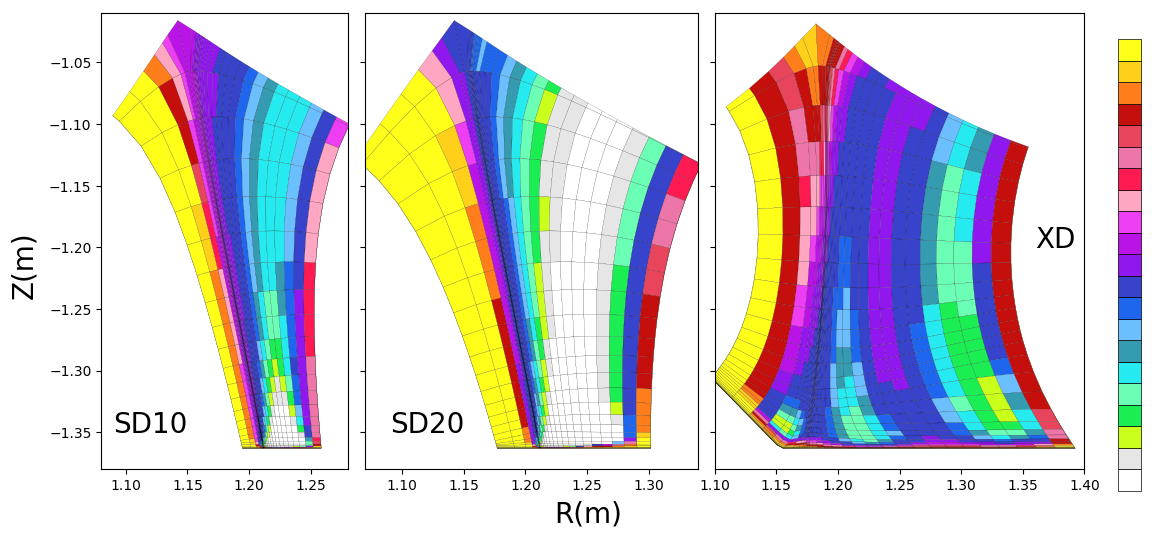

In [89]:
fig_1

### for Carbon neutral density

rescale the data by $10^{18}$

In [60]:
SD_nNeutC_outerdiv_rescale = SD_nNeutC_outerdiv / 1e15
FS_nNeutC_outerdiv_rescale = FS_nNeutC_outerdiv / 1e15
XD_nNeutC_outerdiv_rescale = XD_nNeutC_outerdiv / 1e15

In [61]:
# colorcode.bin = [2.0, 5.0, 10, 15, 20, 30, 40, 50, 75, 100, 125, 150, 200, 300, 400, 500, 600, 700, 800, 900]
# colorcode.bin = [0.001, 0.005, 0.02, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
colorcode.bin = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10, 15, 20, 30, 50, 100, 200, 500, 1000, 2000]

In [62]:
# if you want tuple, remember to use "tuple()", otherwise () will not give you a tuple in this case

colors_SD_nNeutC_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(SD_nNeutC_outerdiv_rescale))

colors_FS_nNeutC_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(FS_nNeutC_outerdiv_rescale))

colors_XD_nNeutC_outerdiv = tuple(colorcode.map2color(x) for x in numpy.ravel(XD_nNeutC_outerdiv_rescale))

In [63]:
stainedglass_SD_outerdivertor.set_facecolor(colors_SD_nNeutC_outerdiv)

stainedglass_FS_outerdivertor.set_facecolor(colors_FS_nNeutC_outerdiv)

stainedglass_XD_outerdivertor.set_facecolor(colors_XD_nNeutC_outerdiv)

In [64]:
for text in bin_text_fig_1:
    text.remove()
unit_fig_1.remove()

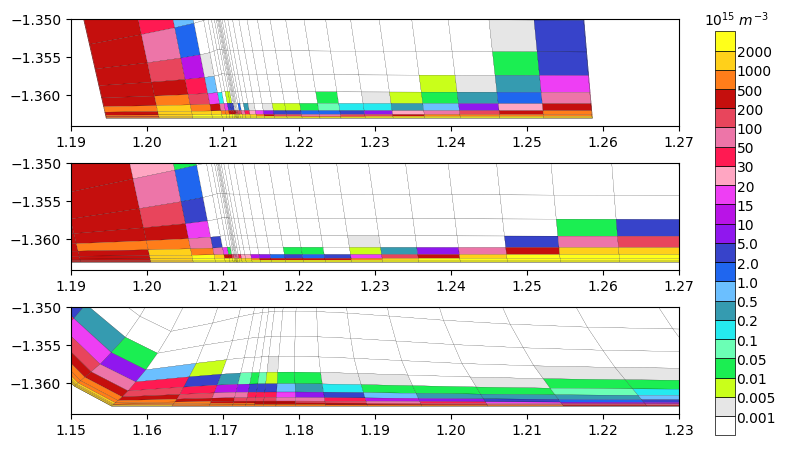

In [65]:
bin_text_fig_1 = [colorcode.axes.text(1.00, (i+1)*bin_height - 0.01, str(colorcode.bin[i])) for i in range(len(colorcode.bin))]
unit_fig_1 = colorcode.axes.text(0.83, 1.01, '$10^{15}$ $m^{-3}$')
fig_1

In [66]:
fig_1.savefig('nNeutCP6_2D.svg', format='svg', bbox_inches='tight')